<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Demo: CNN with Keras

# Faces classification with Keras

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

# Import libraries

In [2]:
# Check keras and tensorflow versions
# import keras
import tensorflow as tf
# import keras from tf
from tensorflow import keras

print("Keras version: ", keras.__version__)
print("Tensorflow version: ", tf.__version__)

Keras version:  2.4.0
Tensorflow version:  2.3.1


In [3]:
## Import libraries
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.metrics import confusion_matrix

# import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.utils import to_categorical

# Load data

In [4]:
# The faces dataset
faces = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Kester Chia\scikit_learn_data


In [5]:
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

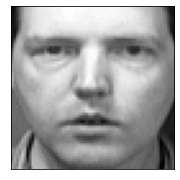

In [6]:
id = np.random.randint(len(faces.target))
plt.figure(figsize = (3, 3))
plt.imshow(faces.images[id], cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [7]:
# Prepare input data
# input
X = faces.images
img_rows, img_cols = X[0].shape
X = X.reshape(X.shape[0], img_rows, img_cols, 1)

# output
target = faces.target.astype(np.uint8)

# Convert the target to categorical
y = to_categorical(
    target,
    num_classes = len(set(target)),
    dtype = 'uint8')

In [8]:
filter = []
# run in blocks of 10
for i in range(len(target) // 10):
    s = set()
    while len(s) < 2:
        s = set(np.random.randint(0, 10, 2, dtype = np.int8))
    a = [x in s for x in range(10)]
    filter.append(a)
test = np.array(filter).flatten()
train = np.array([not t for t in test])

In [9]:
X_train = X[train].copy()
X_test  = X[test].copy()
y_train = y[train].copy()
y_test  = y[test].copy()

In [29]:
X_train.shape

(320, 64, 64, 1)

In [32]:
y_train.shape

(320, 40)

In [10]:
# shuffle training data
from sklearn.utils import shuffle
X_train2, y_train2 = shuffle(X_train, y_train, random_state=42)

In [11]:
# Set up the model architecture
model = Sequential()

In [12]:
# Add a convolutional layer
model.add(Conv2D(60,
                 kernel_size = 4,
                 activation = 'relu',
                 data_format = 'channels_last',
                 padding = 'valid',
                 input_shape = (img_rows, img_cols, 1)))

# Add another convolutional layer
model.add(Conv2D(30,
                 kernel_size = 2,
                 activation = 'relu'))

# Flatten the output of the convolutional layer
model.add(Flatten())

# Add an output layer for the 3 categories
model.add(Dense(len(set(target)),
                activation = 'softmax'))

In [13]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 61, 61, 60)        1020      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 30)        7230      
_________________________________________________________________
flatten (Flatten)            (None, 108000)            0         
_________________________________________________________________
dense (Dense)                (None, 40)                4320040   
Total params: 4,328,290
Trainable params: 4,328,290
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
# Compile the model 
model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [15]:
%%time
# Fit the model on a training set
history = model.fit(
    # X_train,
    # y_train,
    # use shuffled data
    X_train2,
    y_train2, 
    validation_split = 0.2,
    epochs = 20,
    batch_size = 10)

Epoch 1/20
26/26 [==============================] - 2s 63ms/step - loss: 4.5873 - accuracy: 0.0234 - val_loss: 3.6860 - val_accuracy: 0.1250
Epoch 2/20
26/26 [==============================] - 2s 58ms/step - loss: 3.6381 - accuracy: 0.1016 - val_loss: 3.6103 - val_accuracy: 0.0625
Epoch 3/20
26/26 [==============================] - 2s 61ms/step - loss: 3.1200 - accuracy: 0.3359 - val_loss: 3.1526 - val_accuracy: 0.3750
Epoch 4/20
26/26 [==============================] - 2s 60ms/step - loss: 1.5092 - accuracy: 0.7461 - val_loss: 1.6713 - val_accuracy: 0.703182 - accuracy: 
Epoch 5/20
26/26 [==============================] - 2s 60ms/step - loss: 0.3112 - accuracy: 0.9531 - val_loss: 1.2719 - val_accuracy: 0.6875
Epoch 6/20
26/26 [==============================] - 2s 62ms/step - loss: 0.0873 - accuracy: 0.9883 - val_loss: 0.7341 - val_accuracy: 0.7969 - accuracy: 0.
Epoch 7/20
26/26 [==============================] - 2s 63ms/step - loss: 0.0221 - accuracy: 1.0000 - val_loss: 0.6010 - val_

In [16]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [17]:
score = model.evaluate(X_test, y_test, batch_size = 10)
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(score))

8/8 [==============================] - 0s 9ms/step - loss: 0.4052 - accuracy: 0.9000

Test loss: 0.405158, Test accuracy: 0.900000


In [18]:
def print_cm(cm):
    d_size = max(len('%d' % cm.max()), len('%d' % cm.shape[1]))
    if min(cm.shape) > 10: # make sparse
        print('Sparse Matrix (*=diagonal)')
        fmt_r = 'r%%0%dd' % d_size
        fmt_c = ', c%%0%dd%%s= %%%dd' % (d_size, d_size)
        for i in range(cm.shape[0]):
            s = fmt_r % i
            for j in range(cm.shape[1]):
                if cm[i, j] > 0:
                    s += fmt_c % (j, '*' if i == j else ' ', cm[i, j])
            print(s)
    else: # make dense
        c = '%%%dd ' % d_size
        s = '%s| ' % (' ' * d_size)
        s += ''.join([c % i for i in range(len(cm[0]))])
        print(s)
        print('-' * len(s))
        for i, r in enumerate(cm):
            s = '%2d| ' % i
            s += c * len(r)
            print(s % tuple(r))

In [19]:
y_test_target = np.array([x.argmax() for x in y_test])
cm = confusion_matrix(y_test_target, predictions)
print_cm(cm)

Sparse Matrix (*=diagonal)
r00, c00*=  2
r01, c01*=  2
r02, c02*=  2
r03, c03*=  2
r04, c04*=  2
r05, c05*=  2
r06, c04 =  1, c15 =  1
r07, c07*=  2
r08, c08*=  2
r09, c09*=  2
r10, c10*=  2
r11, c11*=  2
r12, c02 =  1, c20 =  1
r13, c13*=  1, c24 =  1
r14, c14*=  2
r15, c15*=  2
r16, c02 =  1, c16*=  1
r17, c17*=  1, c22 =  1
r18, c18*=  2
r19, c19*=  2
r20, c20*=  2
r21, c21*=  2
r22, c22*=  2
r23, c23*=  2
r24, c24*=  2
r25, c25*=  2
r26, c26*=  2
r27, c27*=  2
r28, c28*=  2
r29, c29*=  2
r30, c30*=  2
r31, c31*=  2
r32, c32*=  2
r33, c33*=  2
r34, c34*=  2
r35, c18 =  1, c35*=  1
r36, c36*=  2
r37, c37*=  2
r38, c38*=  2
r39, c39*=  2


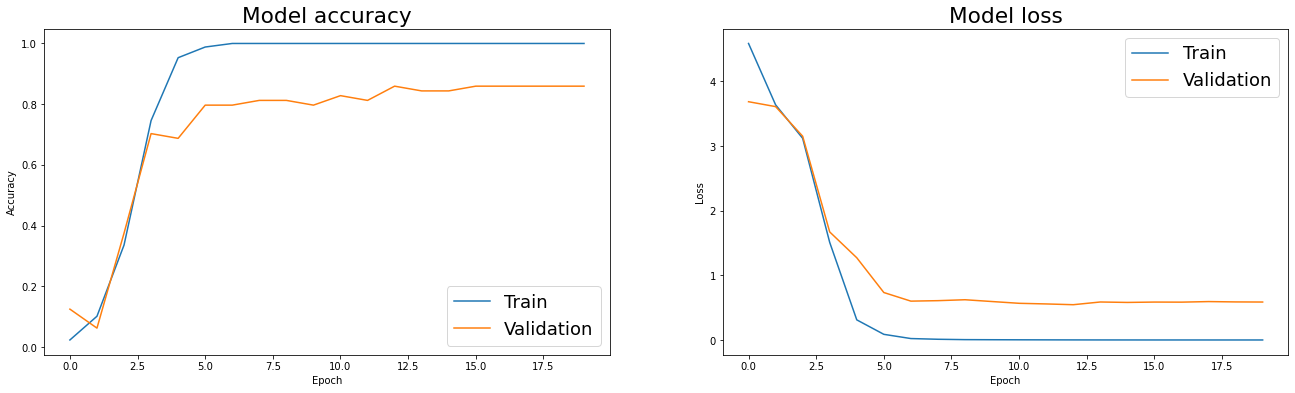

In [20]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 18})

# Plot training & validation accuracy values
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'])

# Plot training & validation loss values
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'])

plt.show()

In [21]:
def implot2(im1, im2, id):
    t1 = y_test[id].argmax()
    t2 = predictions[id]

    fig, ax = plt.subplots(1, 2, figsize = (6, 3))
    fig.subplots_adjust(left = 0.02, right = 0.98, top = 0.85, wspace = 0.2)
    fig.suptitle('Prediction %d' % id, fontsize = 12, fontweight = 'bold')

    plt.rcParams.update({'font.size': 10})

    # original image
    ax[0].imshow(im1, cmap = 'gray')
    ax[0].set_title('Original id: %d' % t1)
    ax[0].set_xticks([])
    ax[0].set_yticks([])

    # convoluted image
    ax[1].imshow(im2, cmap = 'gray')
    ax[1].set_title('Test id: %d' % t2)
    ax[1].set_xticks([])
    ax[1].set_yticks([])

    plt.show()

In [22]:
def pick_test_image(pid):
    # pick the prediction
    ppid = predictions[pid]
    # find the corresponding image
    j = -1
    for ipid in range(test.shape[0]):
        if test[ipid]:
            j += 1
        if j == pid:
            break
    return X[ipid].reshape(img_rows, img_cols)

In [23]:
def pick_train_image(ppid):
    oid = np.array([a.argmax() == ppid for a in y_train]).argmax()
    poid = y_train[oid].argmax()
    j = -1
    for ioid in range(train.shape[0]):
        if train[ioid]:
            j += 1
        if j == oid:
            break
    return X[ioid].reshape(img_rows, img_cols)

In [24]:
def compare_images(id):
    XTest = pick_test_image(id)
    XTrain = pick_train_image(predictions[id])
    implot2(XTrain, XTest, id)

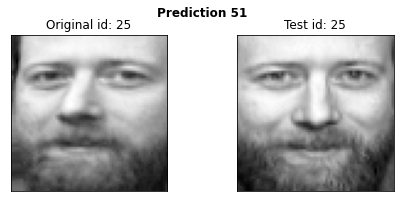

In [25]:
# compare one
id = np.random.randint(len(predictions))
compare_images(id)

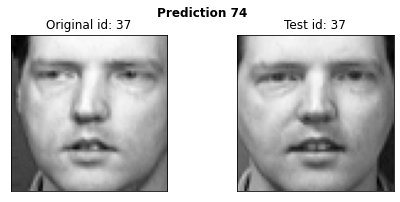

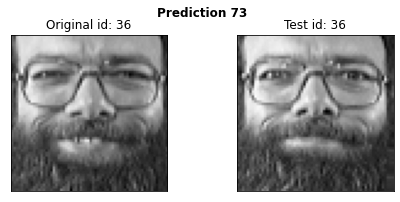

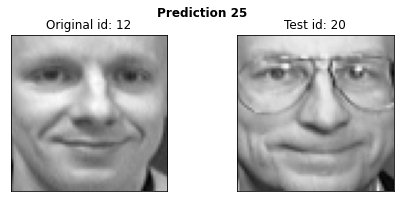

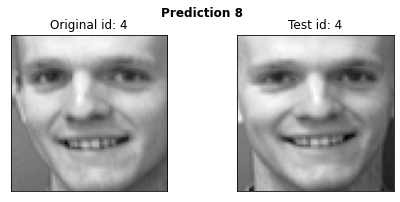

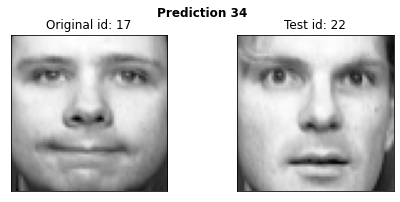

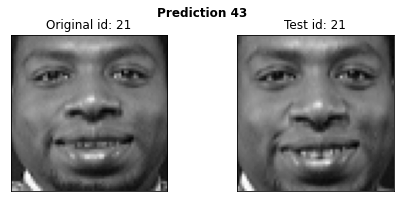

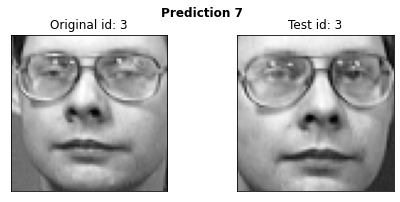

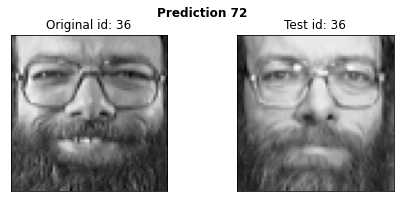

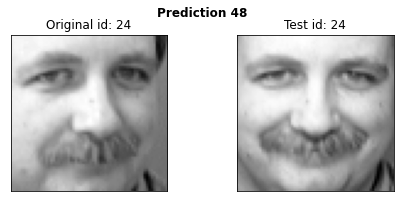

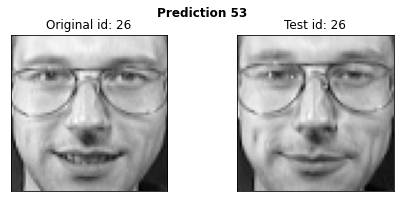

In [26]:
# compare ten
ids = np.random.randint(len(predictions), size = 10)
for id in ids:
    compare_images(id)

© 2020 Institute of Data